In [19]:
import pandas as pd 
from pandas import DataFrame
import numpy as np 
import datetime as dt
data = pd.read_csv('RawData.csv', parse_dates=[0], dayfirst = True, low_memory = False)
k = data.loc[data.Detected_State == 'Maharashtra', ['Date_Announced', 'Detected_City', 'Detected_District', 'Num_Cases', 'Current_Status']]

In [45]:
k.Detected_District.isnull()
k.Detected_District.unique()

k.sort_values(by='Date_Announced')
k.update(k.Date_Announced)

kcopy = k.copy()
kcopy.update(kcopy.Detected_District.replace(to_replace =["Unknown", "Other State"], value ="Unknown/Other District")) 
kcopy.update(kcopy.Detected_District.replace(to_replace = ["Nandurbar", "Dhule", "Nashik", "Palghar","Thane","Mumbai", "Aurangabad", "Ahmednagar", "Pune", "Jalgaon"], value = "North Maharastra"))
kcopy.update(kcopy.Detected_District.replace(to_replace = ["Raigad","Satara", "Nanded", "Sangli", "Kolhapur", "Sindhudurg", "Ratnagiri", "Solapur"], value = "South Mahrashtra"))
kcopy.update(kcopy.Detected_District.replace(to_replace = ["Amravati", "Nagpur", "Bhandara", "Gondia", "Gadchiroli", "Chandrapur", "Yavatmal"], value = "East Maharashtra"))
kcopy.update(kcopy.Detected_District.replace(to_replace = ["Buldhana", "Wardha","Akola", "Washim", "Hingoli", "Parbhani", "Jalna", "Beed", "Latur", "Osmanabad"], value = "Mid Maharashtra"))

kcopy.sort_values(by='Date_Announced')

,Date_Announced,Detected_City,Detected_District,Num_Cases,Current_Status
739,01/06/2020,NaN,Mid Maharashtra,7,Recovered
770,01/06/2020,NaN,North Maharastra,9,Deceased
771,01/06/2020,NaN,South Mahrashtra,2,Deceased
772,01/06/2020,NaN,North Maharastra,15,Deceased
814,01/06/2020,NaN,Mid Maharashtra,19,Hospitalized
...,...,...,...,...,...
51086,30/06/2020,NaN,Unknown District,4,Hospitalized
51085,30/06/2020,NaN,Mid Maharashtra,8,Hospitalized
51084,30/06/2020,NaN,North Maharastra,115,Hospitalized
51091,30/06/2020,NaN,South Mahrashtra,25,Hospitalized


In [49]:
k.Num_Cases.isnull()
k.Num_Cases.fillna(0)

k.update((k.Num_Cases).apply(abs)) 
kcopy.update((kcopy.Num_Cases.apply(abs)))

In [50]:
#kcopy.update(kcopy.groupby(kcopy.Date_Announced).sum())

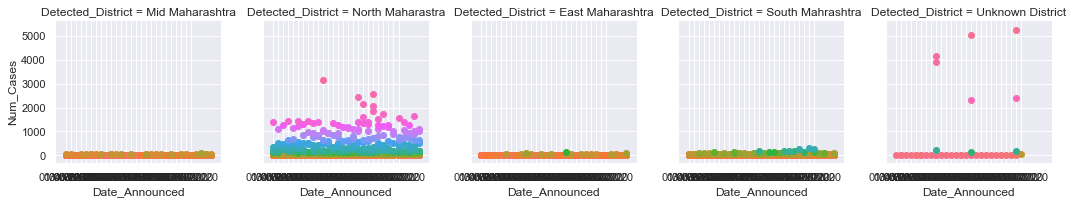

In [51]:
import seaborn as sns 
import matplotlib.pyplot as plt
#sns.set(style="ticks")
g = sns.FacetGrid(kcopy, col="Detected_District", hue="Num_Cases")
g.map(plt.scatter, "Date_Announced", "Num_Cases")
#plt.xticks(rotation=90)
plt.show()

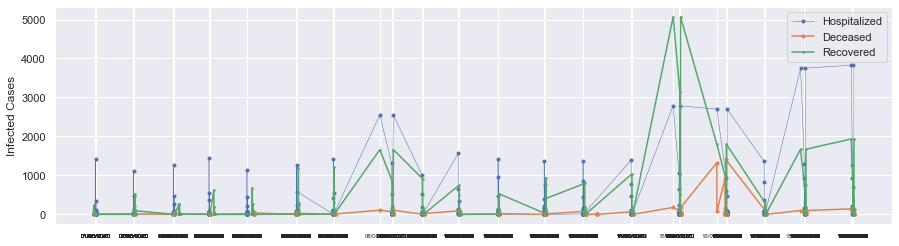

In [52]:


hplot = k.loc[(kcopy.Current_Status=='Hospitalized'), ['Date_Announced','Num_Cases']]
rplot = k.loc[(kcopy.Current_Status=='Recovered') , ['Date_Announced', 'Current_Status','Num_Cases']] 
dplot = k.loc[(kcopy.Current_Status=='Deceased'),['Date_Announced', 'Current_Status','Num_Cases']]

#kplot = k.loc[(kcopy.Current_Status=='Deceased')|(kcopy.Current_Status=='Recovered')| (kcopy.Current_Status=='Hospitalized'),['Date_Announced', 'Current_Status','Num_Cases']]
sns.set(rc={'figure.figsize':(15, 4)})
start, end = '1/6/2020', '30/6/2020'


fig, ax = plt.subplots()
plt.xticks(hplot.index, hplot["Date_Announced"].values)
ax.plot(hplot.loc[start:end, 'Num_Cases'],
marker='.', linestyle='-', linewidth=0.5, label='Hospitalized')
ax.plot(dplot.loc[start:end, 'Num_Cases'],
marker='o', markersize=3, linestyle='-', label='Deceased') 
ax.plot(rplot.loc[start:end, 'Num_Cases'],
marker='.', markersize=3, linestyle='-', label='Recovered') 
ax.set_ylabel('Infected Cases')
ax.tick_params(axis="x", labelsize=6)
ax.legend();